**AASD 4015 Advanced Mathematical Concepts for Deep Learning
Project 1: MNIST Handwriting Classification
The project is conducted by Cheuk Yin Li 101386432, Eman Elsefy 101428470, Shui Hei Yung 101409756
The dataset is extracted from MNIST. ***

The project aims to classify images of handwriting words using a convolutional neural network (CNN) with hyperparameter tuning and fine-tuning techniques. The dataset consists of 60,000 training samples and 10,000 testing samples, with 10 classes in total (0-9). Deep learning approaches are used to train the model, which consists of convolution layers, a fully connected layer, dropout layer, and softmax layer. To optimize the model's performance, hyperparameter tuning techniques are applied, including adjusting the optimizer and the number of epochs used during training.

In addition to hyperparameter tuning, fine-tuning techniques are also employed to further improve the model's accuracy. Fine-tuning involves taking a pre-trained neural network that was previously trained on a similar task and adjusting its parameters to improve its performance on the current task. In this project, we will use the pre-trained weights from a different dataset and fine-tune the model to classify handwriting words.

By fine-tuning the pre-trained model on the current dataset, we can leverage the knowledge captured in the pre-trained weights and significantly reduce the time and resources needed to achieve high accuracy. The fine-tuning process will involve adjusting the model's architecture, retraining the fully connected layers, and fine-tuning the pre-trained weights to improve the model's accuracy on the current task.

Through this project, we aim to showcase the effectiveness of fine-tuning techniques in improving the performance of deep learning models, specifically in the context of image classification tasks.

In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
# Print the shape of the training and testing data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


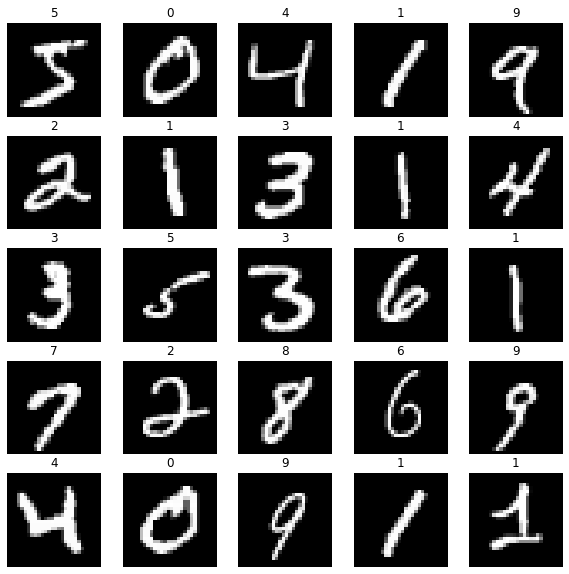

In [18]:
# Plot the first 25 images in the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
plt.show()

In [39]:
# Calculate the class distribution for x_train
unique, counts = np.unique(y_train, return_counts=True)
train_class_dist = dict(zip(unique, counts))
print('Class distribution for x_train:', train_class_dist)

Class distribution for x_train: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


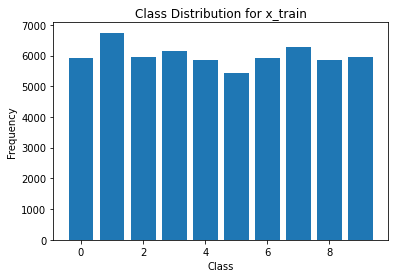

In [40]:
# Plot the class distribution for x_train
plt.bar(train_class_dist.keys(), train_class_dist.values())
plt.title('Class Distribution for x_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [43]:
#By coloring the points based on their corresponding labels, we can visualize how the different classes are distributed in this space, and whether there are any clear patterns or clusters that separate them from each other.
idx = np.random.randint(x_train.shape[0], size=500)
x_train_sample = x_train[idx, :]
y_train_sample = y_train[idx]

# Fit PCA model to the data
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_sample.reshape(x_train_sample.shape[0], -1))

# Plot the scatterplot
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train[idx], cmap='tab10')
plt.colorbar()
plt.show()

TypeError: ignored

In [27]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [28]:
# Reshape input data to match VGG16 input shape
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))

In [29]:
# Print the new shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 48, 48, 3)
Testing data shape: (10000, 48, 48, 3)


In [30]:
# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


In [31]:
# Freeze layers in the base model
for layer in base_model.layers[:15]:
    layer.trainable = False

In [32]:
# Create a new model by adding additional layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [33]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
train_datagen.fit(x_train)

In [48]:
# Train the model
#model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


In [49]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

In [53]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [78]:
#history = model.fit(train_generator, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
history = model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.0267 - val_accuracy: 0.9939
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0219 - accuracy: 0.9951 - val_loss: 0.0262 - val_accuracy: 0.9939
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0220 - accuracy: 0.9945 - val_loss: 0.0323 - val_accuracy: 0.9941
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.0388 - val_accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0323 - val_accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.0209 - val_accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0150 - accuracy: 0.9962 - val_loss: 0.0356 -

In [79]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0255 - accuracy: 0.9942
Test loss: 0.025501683354377747
Test accuracy: 0.9941999912261963


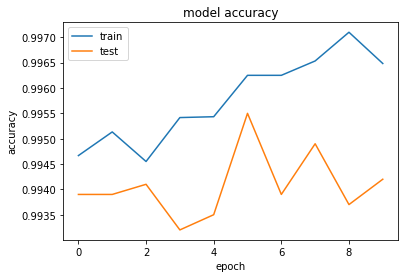

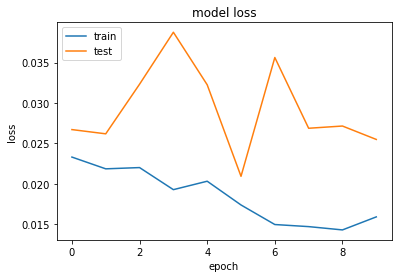

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [81]:
# Fine-tune the model by unfreezing more layers
for layer in base_model.layers[10:]:
    layer.trainable = True

In [82]:
# Re-compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

In [84]:
# Train the model again with a lower learning rate
#model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
history = model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0286 - val_accuracy: 0.9948
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0277 - val_accuracy: 0.9946
Epoch 3/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0223 - val_accuracy: 0.9943
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0131 - accuracy: 0.9970 - val_loss: 0.0220 - val_accuracy: 0.9952
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0260 - val_accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0121 - accuracy: 0.9973 - val_loss: 0.0266 - val_accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.0386 -

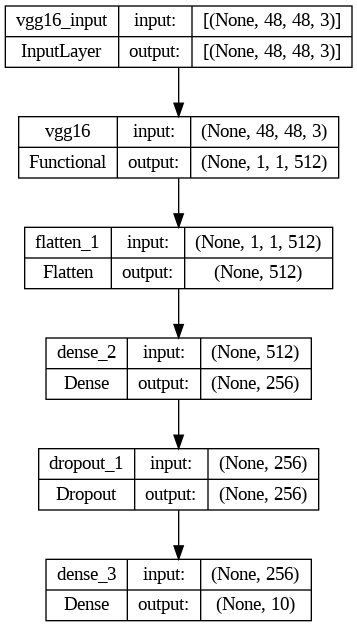

In [85]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [86]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0393 - accuracy: 0.9948
Test loss: 0.039308786392211914
Test accuracy: 0.9947999715805054


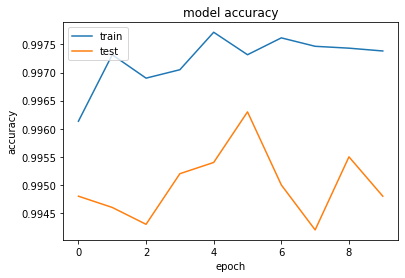

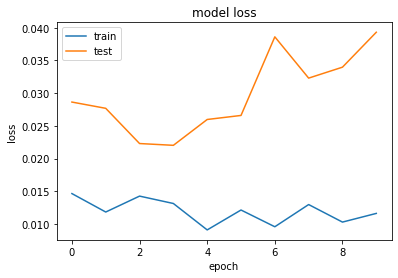

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()